In [1]:
%pip install matplotlib pandas seaborn scikit-learn dtale seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import dtale
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_tr = pd.read_csv('./train_transaction.csv')
df_id = pd.read_csv('./train_identity.csv')

In [4]:
df_tr.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Calculate % of NaN values per column
nan_ratio_tr = df_tr.isna().mean().sort_values(ascending=False)
nan_ratio_id  = df_id.isna().mean().sort_values(ascending=False)

print("Top 10 columns with highest NaN ratio in Transacciones:")
print(nan_ratio_tr.head(10))

print("\nTop 10 columns with highest NaN ratio in Entidades:")
print(nan_ratio_id.head(10))

# Select columns where more than 50% are NaN
cols_majority_nan_tr  = nan_ratio_tr[nan_ratio_tr > 0.5].index.tolist()
cols_majority_nan_id = nan_ratio_id[nan_ratio_id > 0.5].index.tolist()

print("\nColumns with >50% NaN in Transacciones:", cols_majority_nan_tr)
print("Columns with >50% NaN in Entidades:", cols_majority_nan_id)


Top 10 columns with highest NaN ratio in Transacciones:
dist2    0.936284
D7       0.934099
D13      0.895093
D14      0.894695
D12      0.890410
D6       0.876068
D9       0.873123
D8       0.873123
V153     0.861237
V149     0.861237
dtype: float64

Top 10 columns with highest NaN ratio in Entidades:
id_24    0.967088
id_25    0.964419
id_07    0.964259
id_08    0.964259
id_21    0.964231
id_26    0.964204
id_23    0.964162
id_27    0.964162
id_22    0.964162
id_18    0.687221
dtype: float64

Columns with >50% NaN in Transacciones: ['dist2', 'D7', 'D13', 'D14', 'D12', 'D6', 'D9', 'D8', 'V153', 'V149', 'V141', 'V146', 'V154', 'V162', 'V142', 'V158', 'V161', 'V157', 'V138', 'V139', 'V148', 'V140', 'V155', 'V156', 'V147', 'V163', 'V143', 'V145', 'V144', 'V165', 'V164', 'V152', 'V150', 'V151', 'V160', 'V159', 'V166', 'V329', 'V328', 'V326', 'V327', 'V325', 'V331', 'V330', 'V333', 'V323', 'V324', 'V322', 'V339', 'V338', 'V335', 'V334', 'V332', 'V336', 'V337', 'V269', 'V275', 'V277', 'V276

In [6]:
df_full = pd.merge(
    df_tr,
    df_id,
    on="TransactionID",    # clave común
    how="inner"            # solo intersección de IDs
)

print("Shape merged:", df_full.shape)
df_full.head()

Shape merged: (144233, 434)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,0,86535,15.000,H,2803,100.0,150.0,visa,226.0,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,0,86549,75.887,C,16496,352.0,117.0,mastercard,134.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,0,86555,16.495,C,4461,375.0,185.0,mastercard,224.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0,86620,30.000,H,1790,555.0,150.0,visa,226.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [7]:
df_full_with_NAN = pd.merge(
    df_tr,
    df_id,
    on="TransactionID",    # clave común
    how="outer"            # solo intersección de IDs
)

dtale.show(df_full_with_NAN)

In [8]:
nulos = df_full_with_NAN['isFraud'].isna().sum()
print(f"Cantidad de valores nulos en isFraud: {nulos}")

# Calcular proporción de clases
conteo = df_full_with_NAN['isFraud'].value_counts()  # 0 = no fraude, 1 = fraude
porcentaje = df_full_with_NAN['isFraud'].value_counts(normalize=True) * 100

# Mostrar resumen
print("\nDistribución de isFraud:")
for clase in conteo.index:
    print(f"Clase {clase}: {conteo[clase]} registros ({porcentaje[clase]:.2f}%)")

Cantidad de valores nulos en isFraud: 0

Distribución de isFraud:
Clase 0: 569877 registros (96.50%)
Clase 1: 20663 registros (3.50%)


In [9]:
# Define threshold: drop columns with more than 70% NaN
threshold = 0.4

df_full_reduced  = df_full.dropna(axis=1, thresh=int(len(df_full)*(1-threshold)))

print("Shape original Merged:", df_full_reduced.shape)

Shape original Merged: (144233, 247)


In [10]:
df_full_reduced.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_20,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,...,144.0,New,NotFound,samsung browser 6.2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,0,86535,15.000,H,2803,100.0,150.0,visa,226.0,...,500.0,New,NotFound,mobile safari 11.0,T,F,F,T,mobile,iOS Device
2,2987010,0,86549,75.887,C,16496,352.0,117.0,mastercard,134.0,...,142.0,Found,Found,chrome 62.0,F,F,T,T,desktop,Windows
3,2987011,0,86555,16.495,C,4461,375.0,185.0,mastercard,224.0,...,507.0,New,NotFound,chrome 62.0,F,F,T,T,desktop,NaN
4,2987016,0,86620,30.000,H,1790,555.0,150.0,visa,226.0,...,575.0,Found,Found,chrome 62.0,T,F,T,T,desktop,MacOS


In [11]:
df_full_reduced.isna().sum().sort_values(ascending=False)

DeviceInfo        25567
id_13             16913
id_16             14893
V243              13964
V260              13964
                  ...  
TransactionID         0
TransactionDT         0
TransactionAmt        0
id_01                 0
id_12                 0
Length: 247, dtype: int64

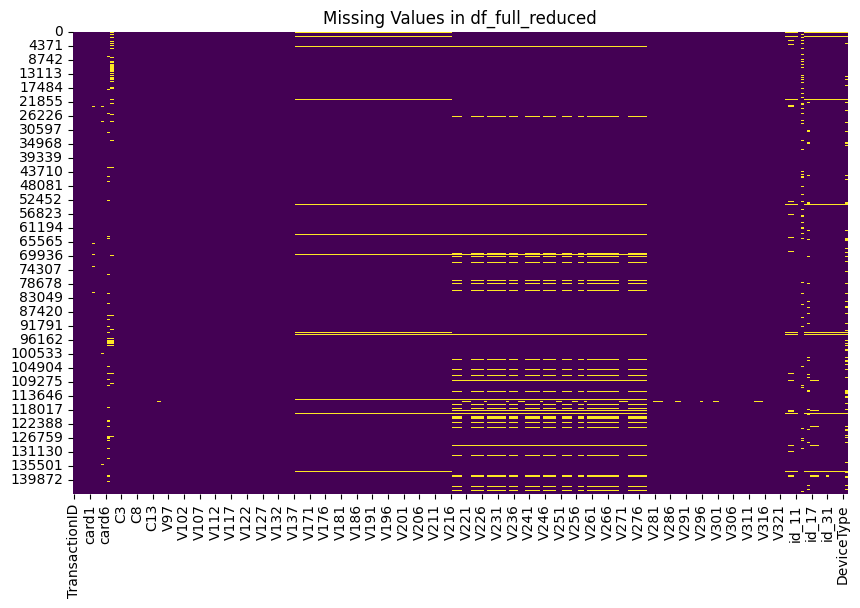

In [12]:
def visualize_missing_values(dataset, title):
    plt.figure(figsize=(10, 6))
    sns.heatmap(dataset.isna(), cbar=False, cmap='viridis')
    plt.title(title)
    plt.show()

# Example usage:
visualize_missing_values(df_full_reduced, 'Missing Values in df_full_reduced')


In [13]:
df_full_cleaned = df_full_reduced.dropna()
df_full_cleaned.shape

(75988, 247)

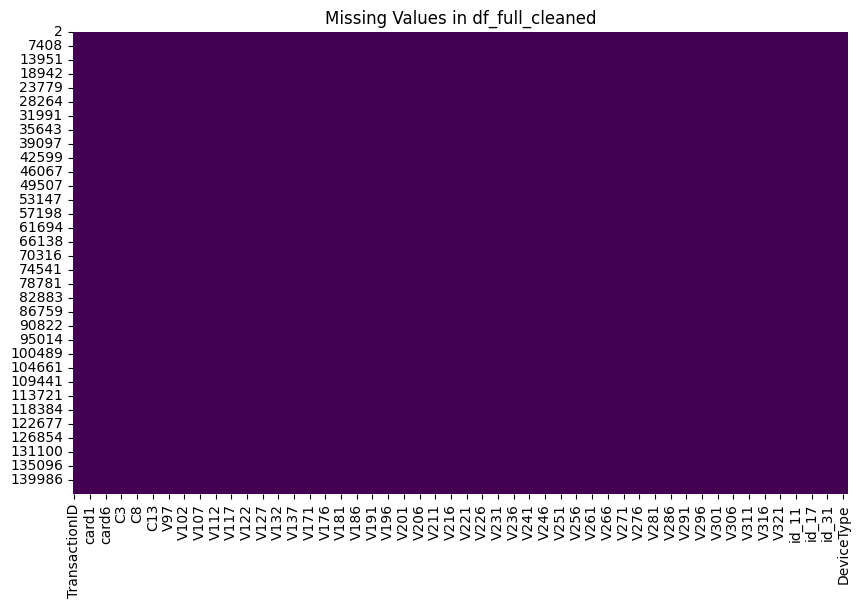

In [14]:
visualize_missing_values(df_full_cleaned, 'Missing Values in df_full_cleaned')

In [15]:
print(df_full_cleaned.shape)
df_full_cleaned.head()

(75988, 247)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_20,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
2,2987010,0,86549,75.887,C,16496,352.0,117.0,mastercard,134.0,...,142.0,Found,Found,chrome 62.0,F,F,T,T,desktop,Windows
8,2987040,0,87209,75.887,C,13329,569.0,117.0,visa,226.0,...,142.0,Found,Found,chrome 62.0,F,F,T,T,desktop,Windows
9,2987048,0,87317,42.294,C,15885,545.0,185.0,visa,138.0,...,507.0,New,NotFound,chrome 62.0,F,F,T,T,desktop,Windows
10,2987049,0,87317,3.595,C,12730,266.0,185.0,mastercard,224.0,...,507.0,New,NotFound,chrome 62.0,F,F,T,T,desktop,Windows
15,2987072,0,87752,6.767,C,13832,375.0,185.0,mastercard,224.0,...,566.0,New,NotFound,chrome 62.0 for android,F,F,T,T,mobile,BLADE A602 Build/MRA58K


In [16]:
def split_by_suffix(df):
    id_cols = [col for col in df.columns if col.startswith('id_')]
    card_cols = [col for col in df.columns if col.startswith('card')]
    v_cols = [col for col in df.columns if col.startswith('V')]

    return id_cols, card_cols, v_cols

# Example usage:
id_cols, card_cols, v_cols = split_by_suffix(df_full_reduced)

print("id_arr shape:", id_cols)
print("card_arr shape:", card_cols)
print("v_arr shape:", v_cols)

id_arr shape: ['id_01', 'id_02', 'id_05', 'id_06', 'id_11', 'id_12', 'id_13', 'id_15', 'id_16', 'id_17', 'id_19', 'id_20', 'id_28', 'id_29', 'id_31', 'id_35', 'id_36', 'id_37', 'id_38']
card_arr shape: ['card1', 'card2', 'card3', 'card4', 'card5', 'card6']
v_arr shape: ['V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215'

In [17]:

dtale.show(df_full_cleaned)